In [252]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [253]:
df=pd.read_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Restaurant_LinearRegression_kaggle/train.csv')

In [254]:
df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [255]:
df.shape

(137, 43)

inference:
this dataset have 137 rows and 43 columns in it.

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
Id            137 non-null int64
Open Date     137 non-null object
City          137 non-null object
City Group    137 non-null object
Type          137 non-null object
P1            137 non-null int64
P2            137 non-null float64
P3            137 non-null float64
P4            137 non-null float64
P5            137 non-null int64
P6            137 non-null int64
P7            137 non-null int64
P8            137 non-null int64
P9            137 non-null int64
P10           137 non-null int64
P11           137 non-null int64
P12           137 non-null int64
P13           137 non-null float64
P14           137 non-null int64
P15           137 non-null int64
P16           137 non-null int64
P17           137 non-null int64
P18           137 non-null int64
P19           137 non-null int64
P20           137 non-null int64
P21           137 non-null int64
P22           137 non-nul

inference:
there are no null values in this dataset.


In [257]:
cols=df.columns
for i in range (0,len(cols)):
    if df[cols[i]].dtypes=='float64' or df[cols[i]].dtypes=='int64':
        print('column name is :  ',cols[i],'ValueCounts are  ','\n',df[cols[i]].value_counts())

column name is :   Id ValueCounts are   
 136    1
42     1
48     1
47     1
46     1
45     1
44     1
43     1
41     1
67     1
40     1
39     1
38     1
37     1
36     1
35     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     1
60     1
61     1
62     1
63     1
64     1
65     1
34     1
33     1
32     1
15     1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
16     1
31     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
66     1
68     1
135    1
111    1
117    1
116    1
115    1
114    1
113    1
112    1
110    1
69     1
109    1
108    1
107    1
106    1
105    1
104    1
118    1
119    1
120    1
121    1
122    1
123    1
124    1
125    1
126    1
127    1
128    1
129    1
130    1
131    1
132    1
133    1
134    1
103    1
102    1
101    1
84     1
70  

### inference:
we can see the range of values in the independent features 'P9','P10','P13','P22' are very less. hence we shall convert it to categorical variables for our modelling.

## checking for outlier in data

In [258]:
cols_outlier=df.select_dtypes('object')
cols_outlier=list(cols_outlier)
cols_outlier=cols_outlier+['P9','P10','P13','P22','Id']

In [259]:
cols_outlier

['Open Date', 'City', 'City Group', 'Type', 'P9', 'P10', 'P13', 'P22', 'Id']

variable    :     P1


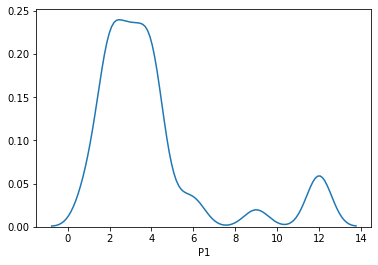

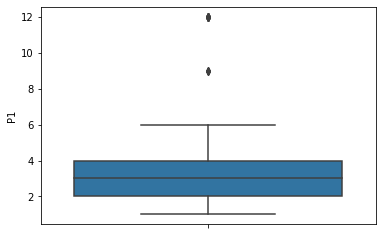






variable    :     P2


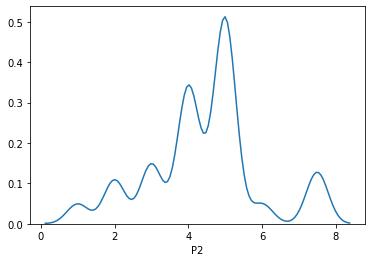

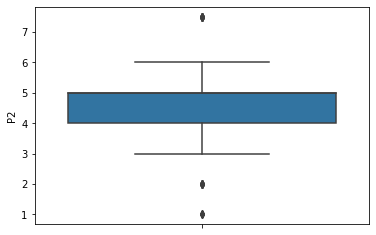






variable    :     P3


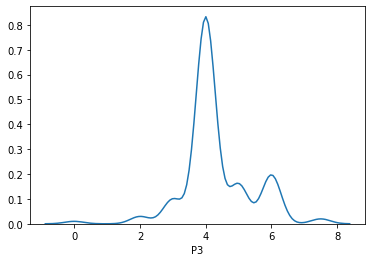

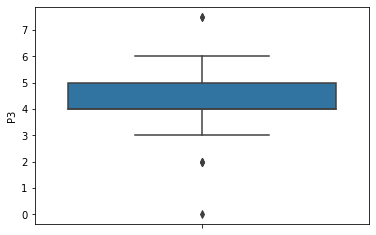






variable    :     P4


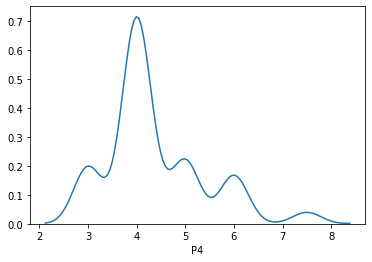

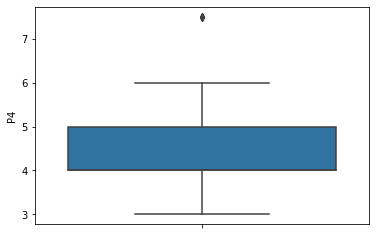






variable    :     P5


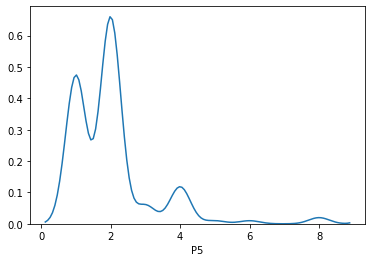

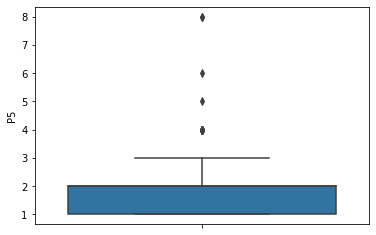






variable    :     P6


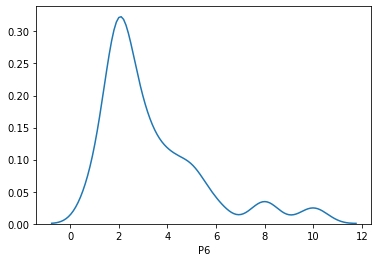

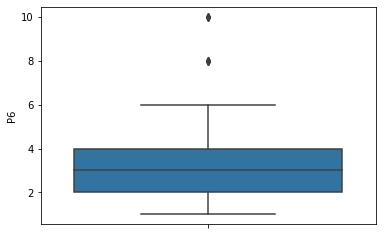






variable    :     P7


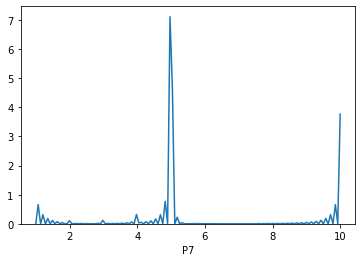

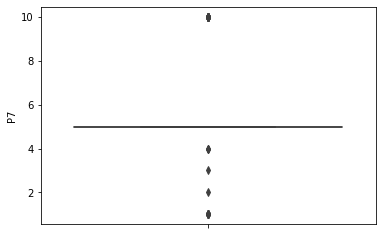






variable    :     P8


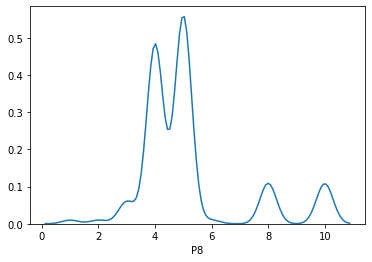

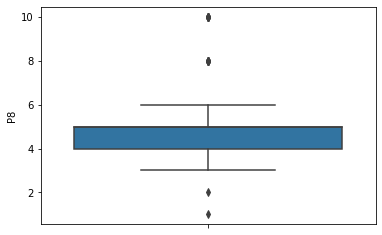






variable    :     P11


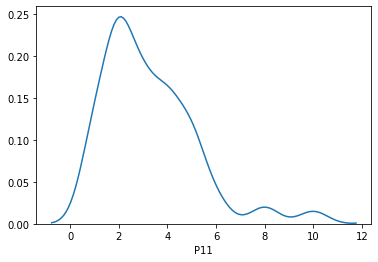

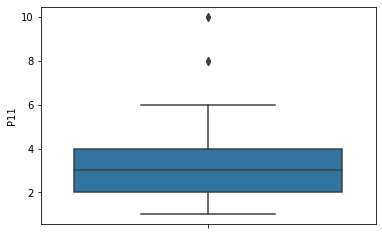






variable    :     P12


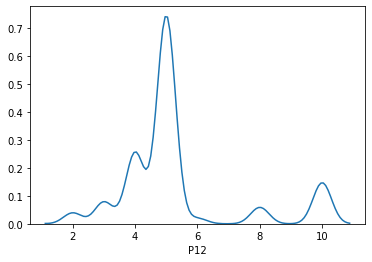

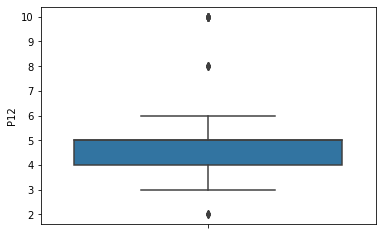






variable    :     P14


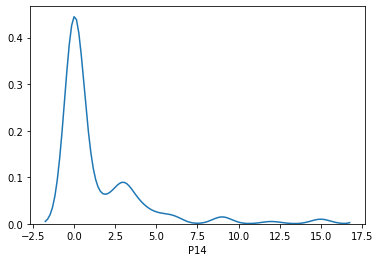

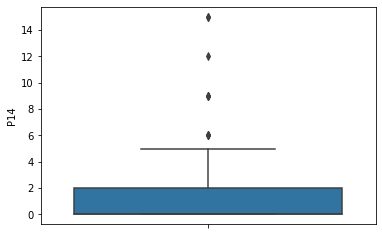






variable    :     P15


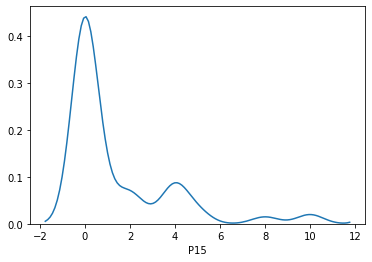

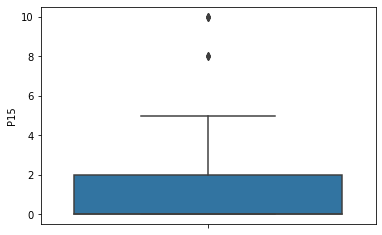






variable    :     P16


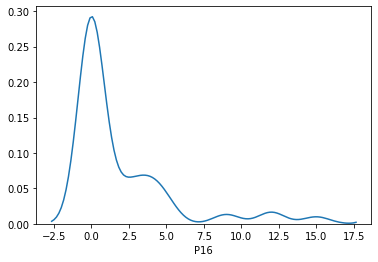

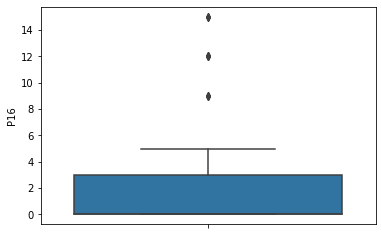






variable    :     P17


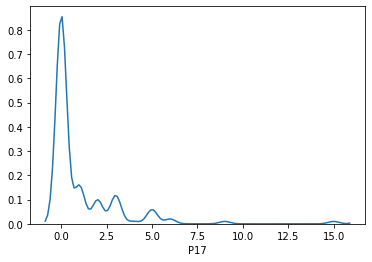

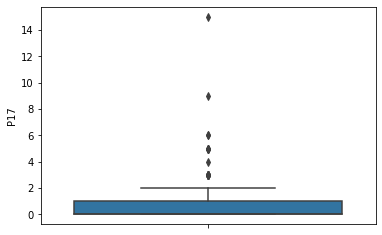






variable    :     P18


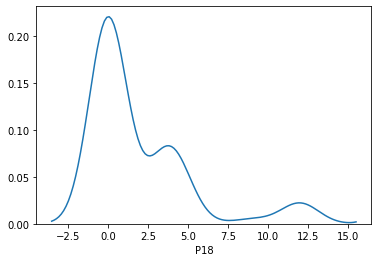

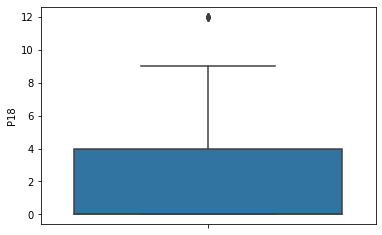






variable    :     P19


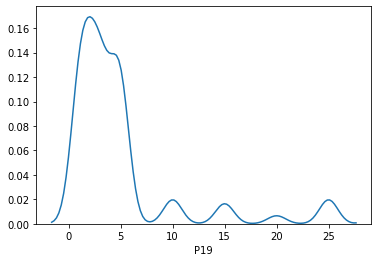

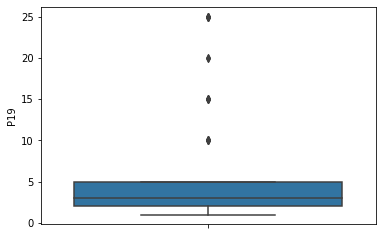






variable    :     P20


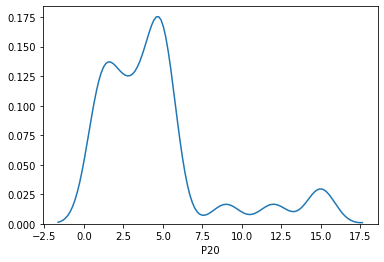

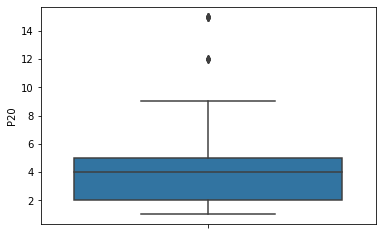






variable    :     P21


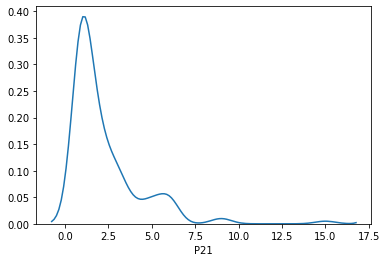

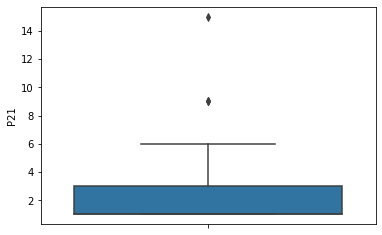






variable    :     P23


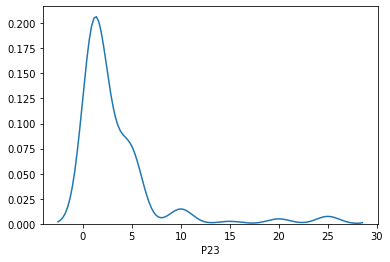

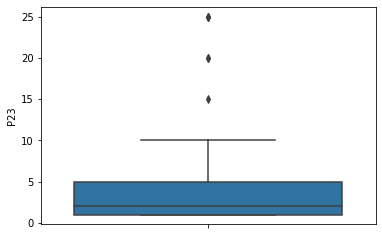






variable    :     P24


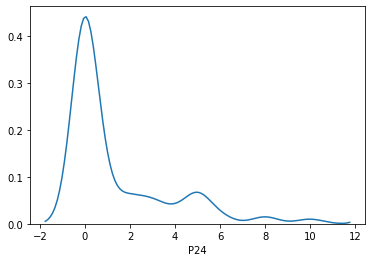

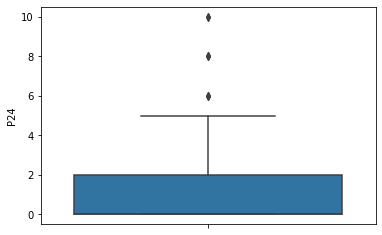






variable    :     P25


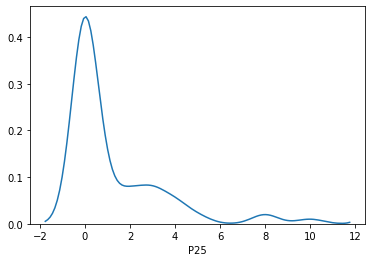

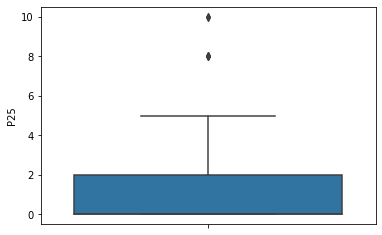






variable    :     P26


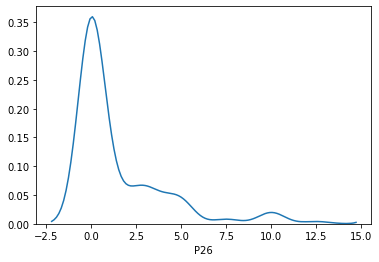

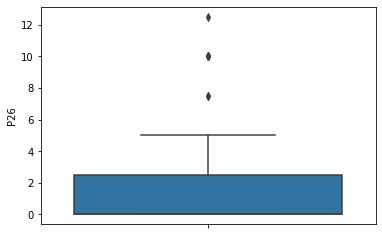






variable    :     P27


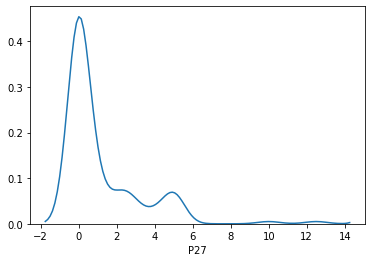

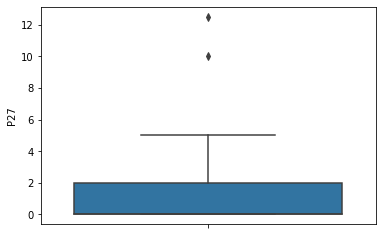






variable    :     P28


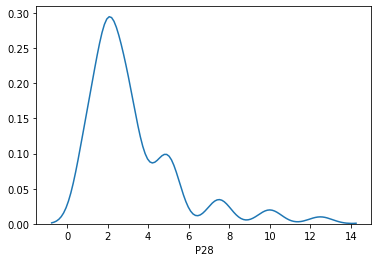

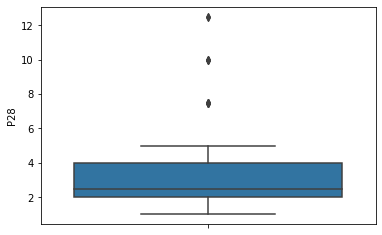






variable    :     P29


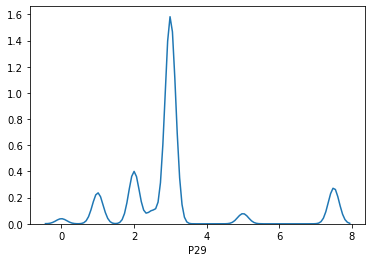

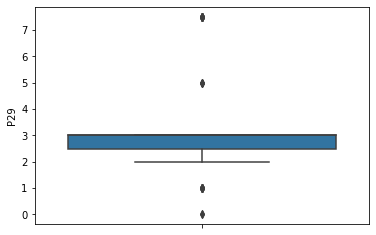






variable    :     P30


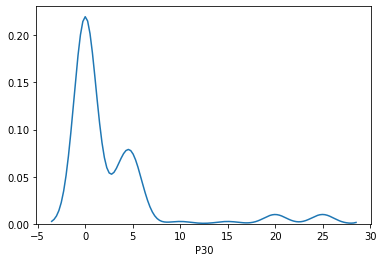

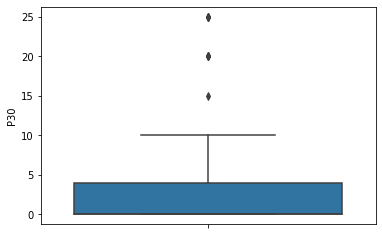






variable    :     P31


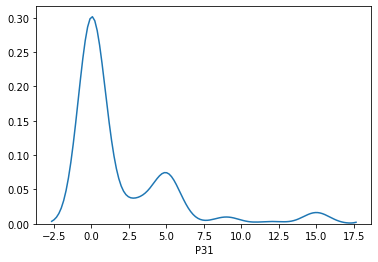

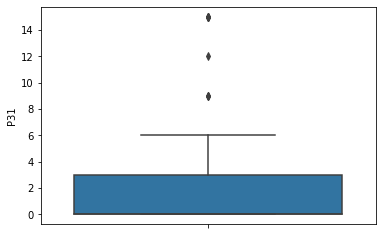






variable    :     P32


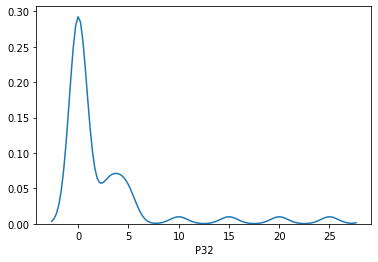

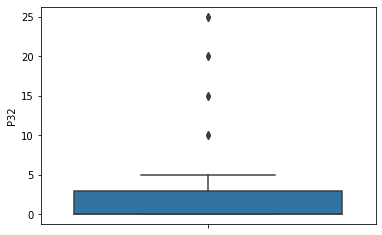






variable    :     P33


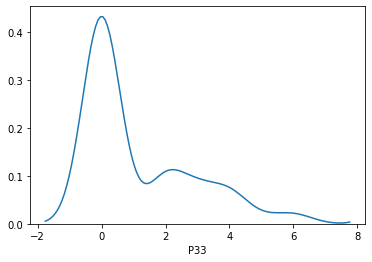

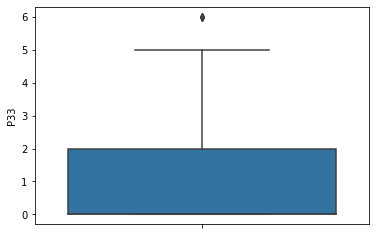






variable    :     P34


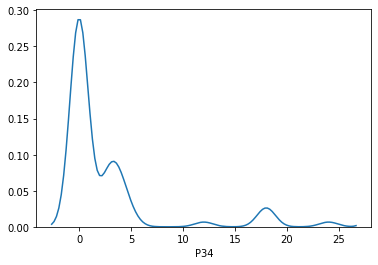

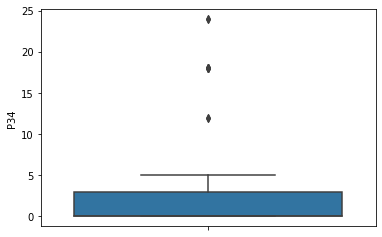






variable    :     P35


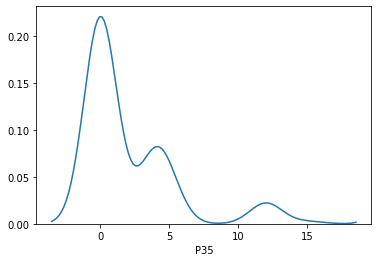

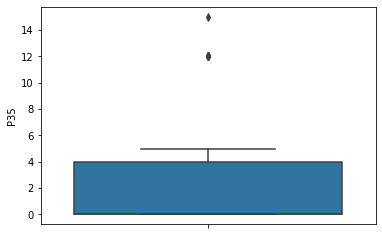






variable    :     P36


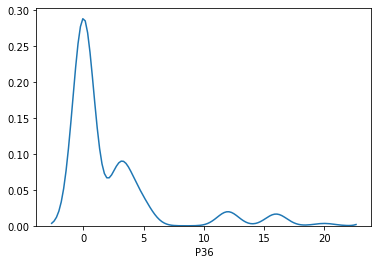

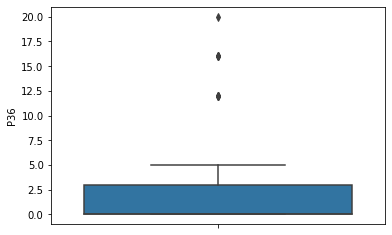






variable    :     P37


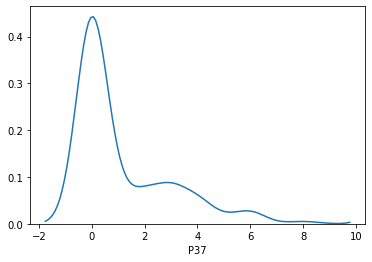

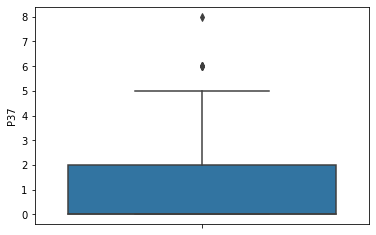






variable    :     revenue


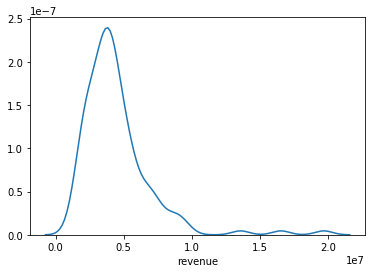

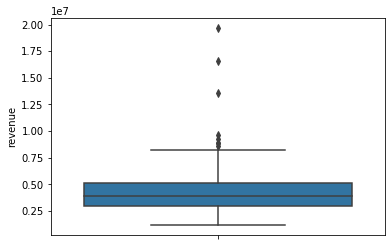

In [260]:
for i in range (0,len(cols)):
    if (df[cols[i]].dtypes=='int64' or df[cols[i]].dtypes=='float64') & (cols[i] not in cols_outlier):
        print("variable    :    ",cols[i])
        sns.distplot(df[cols[i]],hist=False)
        plt.show()
        sns.boxplot(y=df[cols[i]])
        plt.show()
        print('\n\n\n\n')

inference:
    outliers are seen in multiple variables making its distribution biased.hence, we will remove outliers from these features.
    target variable has become right skewed due to presence of outliers in the positive part.as it is target variable we wont remove outlier. to include all outliers in target, we may have to transform the target variable and proceeed.
    

#### transforming target column and removing outliers from independent variables

In [261]:
df['lrevenue']=np.log(df['revenue'])  #taking log of target column

In [262]:
df.shape

(137, 44)

In [263]:
#y=df['lrevenue']
#x=df.drop(columns=['lrevenue','revenue'])

In [264]:
#cols_outlier_wt=cols_outlier+['revenue','lrevenue']
#cols_outlier_wt

In [265]:
outlier_list=['P1','P2','P5','P6','P11','P19','P20','P23','P28']

In [266]:
for i in range (0,len(outlier_list)):
    
        q3=df[outlier_list[i]].quantile(0.75)
        q1=df[outlier_list[i]].quantile(0.25)
        iqr=q3-q1
        df=df[  (df[outlier_list[i]]>=q1-1.5*iqr)  &   (df[outlier_list[i]]<=q3+1.5*iqr)   ]


variable    :     P1


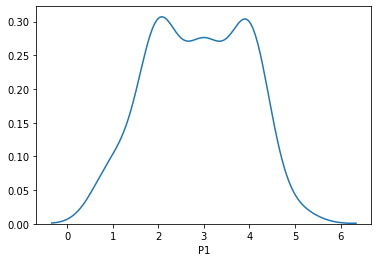

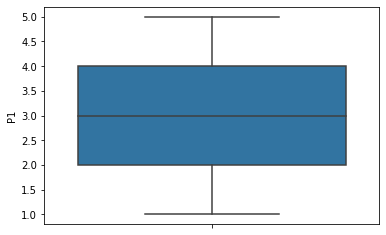






variable    :     P2


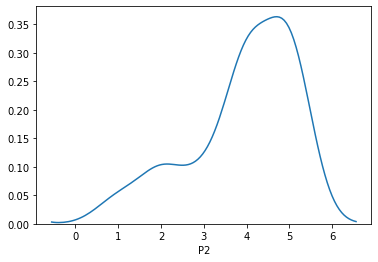

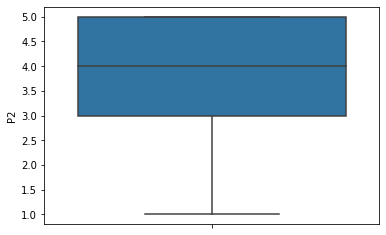






variable    :     P5


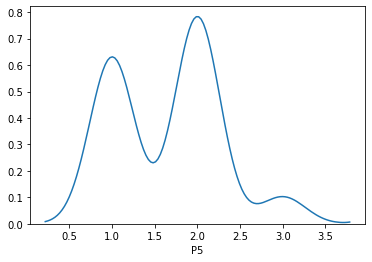

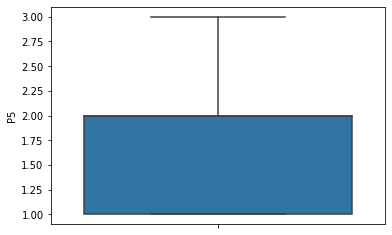






variable    :     P6


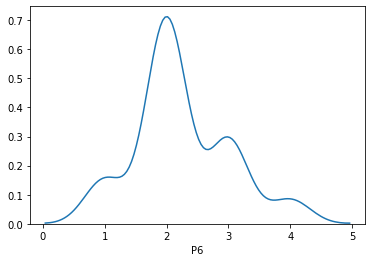

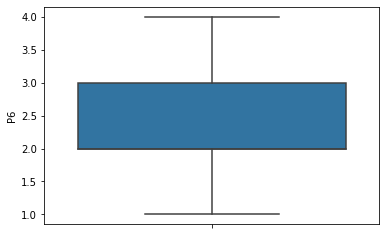






variable    :     P11


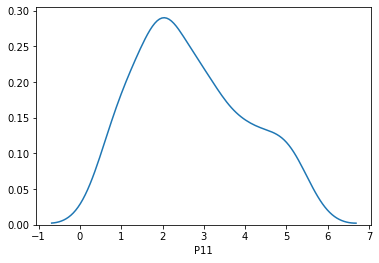

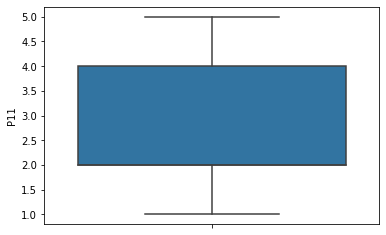






variable    :     P19


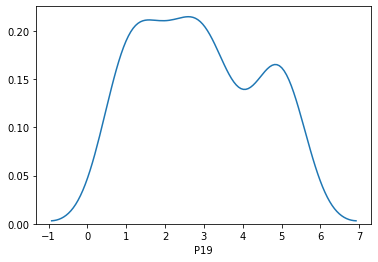

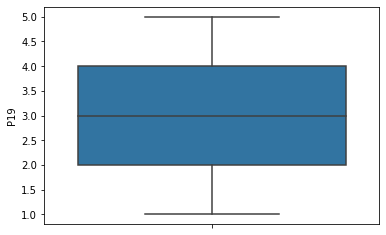






variable    :     P20


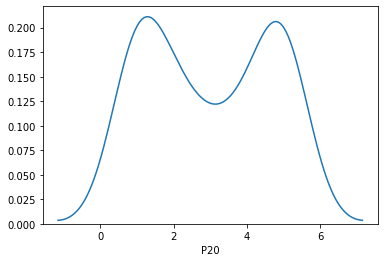

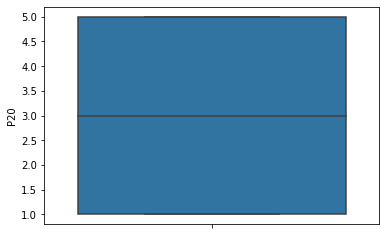






variable    :     P23


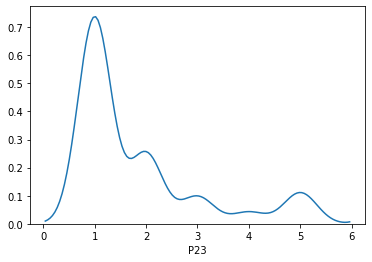

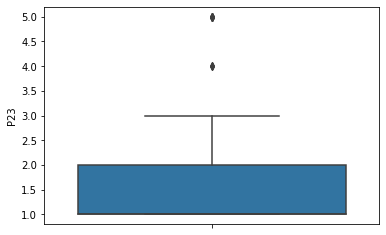






variable    :     P28


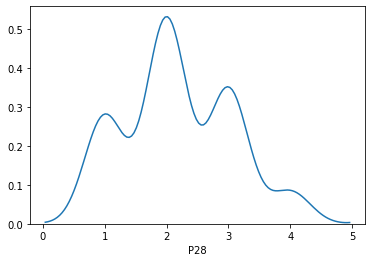

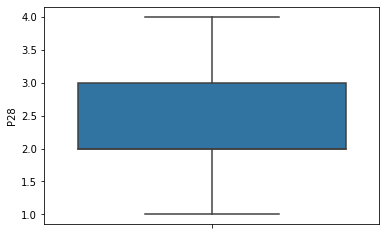

In [267]:
for i in range (0,len(outlier_list)):

        print("variable    :    ",outlier_list[i])
        sns.distplot(df[outlier_list[i]],hist=False)
        plt.show()
        sns.boxplot(y=df[outlier_list[i]])
        plt.show()
        print('\n\n\n\n')

In [268]:
#df=df.drop(columns=['Id'],axis=1)

In [269]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,89.0,6.842697e+01,4.102269e+01,0.000000e+00,3.100000e+01,6.500000e+01,1.040000e+02,1.360000e+02
P1,89.0,2.865169e+00,1.035627e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
P2,89.0,3.910112e+00,1.202653e+00,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00
P3,89.0,3.966292e+00,5.925568e-01,2.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00
P4,89.0,3.977528e+00,5.834367e-01,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00
P5,89.0,1.651685e+00,6.049253e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00
P6,89.0,2.247191e+00,7.580012e-01,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00
P7,89.0,4.505618e+00,1.280302e+00,1.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
P8,89.0,4.438202e+00,7.063841e-01,1.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
P9,89.0,4.685393e+00,4.669900e-01,4.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


In [270]:
df4=df.copy()

## converting categorical varibales:

In [271]:
df4[['P9','P10','P13','P22']]=df4[['P9','P10','P13','P22']].astype('object')

In [272]:
df4['year_open']=df4['Open Date'].apply(lambda i: i[6:10])

In [273]:
df4['current_year']=pd.datetime.now().year   ##to get current year

In [274]:
df4['year_open']=df4['year_open'].astype('int64')

In [275]:
df4['year_working']=df4['current_year']-df4['year_open']

In [276]:
df4=df4.drop(columns=['Open Date','year_open','current_year'])

In [277]:
df4=pd.get_dummies(data=df4,columns=['P9','P10','P13','P22','City','City Group','Type'],drop_first=True)

In [278]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 136
Data columns (total 75 columns):
Id                     89 non-null int64
P1                     89 non-null int64
P2                     89 non-null float64
P3                     89 non-null float64
P4                     89 non-null float64
P5                     89 non-null int64
P6                     89 non-null int64
P7                     89 non-null int64
P8                     89 non-null int64
P11                    89 non-null int64
P12                    89 non-null int64
P14                    89 non-null int64
P15                    89 non-null int64
P16                    89 non-null int64
P17                    89 non-null int64
P18                    89 non-null int64
P19                    89 non-null int64
P20                    89 non-null int64
P21                    89 non-null int64
P23                    89 non-null int64
P24                    89 non-null int64
P25                    89 non

# building statistical model:

In [279]:
y=df4['lrevenue']
x=df4.drop(columns=['lrevenue','revenue'])

In [280]:
df4.sample()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P11,...,City_Osmaniye,City_Sakarya,City_Samsun,City_Tekirdağ,City_Uşak,City_İstanbul,City_İzmir,City_Şanlıurfa,City Group_Other,Type_IL
14,14,2,2.0,4.0,4.0,1,2,5,5,2,...,0,0,0,0,0,0,0,0,1,0


In [281]:
import statsmodels.api as sm
import warnings as warnings
warnings.filterwarnings('ignore')


X=x.assign(const=1)
lr=sm.OLS(y,X).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               lrevenue   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                 -0.163
Method:                 Least Squares   F-statistic:                    0.8240
Date:                Sat, 11 Jan 2020   Prob (F-statistic):              0.725
Time:                        19:59:02   Log-Likelihood:                 6.9986
No. Observations:                  89   AIC:                             128.0
Df Residuals:                      18   BIC:                             304.7
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Id                     -0.0025      0.003     -0.835      0.415      -0.009       0.004
P1                     -0.0149      0.208     -0.072      0.944      -0.452       0.423
P2                      0.0202      0.208      0.097      0.924      -0.417       0.458
P3                      0.1262      0.295      0.428      0.674      -0.493       0.745
P4                     -0.0937      0.292     -0.321      0.752      -0.707       0.519
P5                      0.4006      0.368      1.087      0.291      -0.373       1.175
P6                      0.0350      0.171      0.205      0.840      -0.324       0.394
P7                     -0.0849      0.127     -0.667      0.513      -0.352       0.183
P8                     -0.4151      0.346     -1.200      0.246      -1.142       0.312
P11                    -0.1030      0.181     -0.570      0.575      -0.482       0.276
P12                     0.0457      0.256      0.179      0.860      -0.491       0.583
P14                     0.6733      0.395      1.703      0.106      -0.157       1.504
P15                     0.0347      0.404      0.086      0.932      -0.814       0.884
P16                    -0.8758      0.685     -1.279      0.217      -2.314       0.563
P17                     0.1987      0.453      0.439      0.666      -0.753       1.151
P18                     0.2056      0.455      0.452      0.657      -0.750       1.161
P19                    -0.0723      0.124     -0.581      0.569      -0.334       0.189
P20                    -0.1278      0.121     -1.057      0.305      -0.382       0.126
P21                     0.1154      0.218      0.529      0.603      -0.343       0.574
P23                     0.3026      0.234      1.294      0.212      -0.189       0.794
P24                     0.7373      0.777      0.949      0.355      -0.896       2.370
P25                    -0.6440      0.662     -0.973      0.343      -2.035       0.747
P26                    -0.4385      0.667     -0.658      0.519      -1.839       0.962
P27                    -0.0909      0.242     -0.375      0.712      -0.600       0.419
P28                     0.3919      0.154      2.543      0.020       0.068       0.716
P29                    -0.0229      0.174     -0.131      0.897      -0.389       0.344
P30                     0.4451      0.492      0.905      0.377      -0.588       1.478
P31                     0.1430      0.256      0.560      0.583      -0.394       0.680
P32                     0.0905      0.534      0.170      0.867      -1.031       1.212
P33                    -0.3326      0.807     -0.412      0.685      -2.029       1.364
P34                     0.0921      0.600      0.153      0.880      -1.169       1.353
P35                    -0.4433      0.488     -0.908      0.376      -1.469       0.582
P36

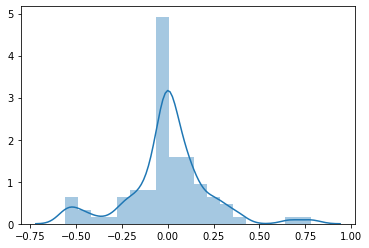

In [282]:
sns.distplot(lr.resid)
plt.show()

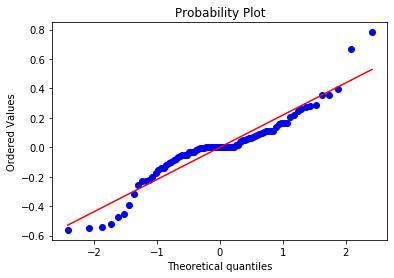

In [283]:
import scipy.stats as stats
stats.probplot(lr.resid, plot=plt)
plt.show()

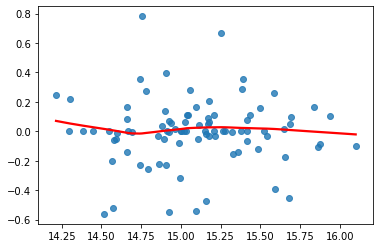

In [284]:
y_pred = lr.predict(X)

sns.regplot(x=y_pred, y=lr.resid, lowess=True, line_kws={'color':'red'})
plt.show()

# improving the model: multicollinearity check

In [285]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X.columns)

,vif
Id,5.416569
P1,16.540727
P2,22.299334
P3,10.852350
P4,10.305947
P5,17.673090
P6,5.953645
P7,9.456623
P8,21.243372
P11,19.605974


In [286]:
X=X.drop(columns=['City_Ankara'],axis=1)

In [287]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X.columns)

,vif
Id,5.416569
P1,16.540727
P2,22.299334
P3,10.852350
P4,10.305947
P5,17.673090
P6,5.953645
P7,9.456623
P8,21.243372
P11,19.605974


In [288]:
X=X.drop(columns=['City_Muğla'],axis=1)

In [289]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X.columns)

,vif
Id,5.416569
P1,16.540727
P2,22.299334
P3,10.852350
P4,10.305947
P5,17.673090
P6,5.953645
P7,9.456623
P8,21.243372
P11,19.605974


In [290]:
X=X.drop(columns=['P33'],axis=1)

In [291]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]


pd.options.display.max_rows=None
pd.DataFrame({'vif': vif[0:]}, index=X.columns)

,vif
Id,5.404097
P1,16.474478
P2,22.293307
P3,10.675656
P4,10.208603
P5,17.645083
P6,5.808187
P7,9.456581
P8,12.961071
P11,17.052170


In [292]:
X=X.drop(columns=['P10_5'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]


pd.options.display.max_rows=None
pd.DataFrame({'vif': vif[0:]}, index=X.columns)

,vif
Id,5.404097
P1,16.474478
P2,22.293307
P3,10.675656
P4,10.208603
P5,17.645083
P6,5.808187
P7,9.456581
P8,12.961071
P11,17.052170


In [293]:
X=X.drop(columns=['P16'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]


pd.options.display.max_rows=None
pd.DataFrame({'vif': vif[0:]}, index=X.columns)

,vif
Id,5.100949
P1,14.242088
P2,19.137957
P3,8.793354
P4,9.829873
P5,17.049676
P6,4.686028
P7,9.453441
P8,12.927881
P11,17.029418


In [294]:
X=X.drop(columns=['P32'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]


pd.options.display.max_rows=None
pd.DataFrame({'vif': vif[0:]}, index=X.columns)

,vif
Id,4.644763
P1,14.090145
P2,18.345202
P3,8.651946
P4,9.761405
P5,13.595308
P6,4.680957
P7,9.333377
P8,11.827239
P11,12.499042


In [295]:
X=X.drop(columns=['P35'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]


pd.options.display.max_rows=None
pd.DataFrame({'vif': vif[0:]}, index=X.columns)

,vif
Id,4.578191
P1,12.970753
P2,17.686504
P3,8.182736
P4,8.096129
P5,12.793292
P6,4.515073
P7,9.332173
P8,11.683148
P11,12.372140


In [296]:
X=X.drop(columns=['P36'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]


pd.options.display.max_rows=None
pd.DataFrame({'vif': vif[0:]}, index=X.columns)

,vif
Id,4.570066
P1,12.725868
P2,17.413280
P3,8.172420
P4,7.554148
P5,12.651300
P6,4.381206
P7,9.332172
P8,10.650989
P11,12.338627


In [297]:
X=X.drop(columns=['P15'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]


pd.options.display.max_rows=None
pd.DataFrame({'vif': vif[0:]}, index=X.columns)

,vif
Id,4.166812
P1,12.718204
P2,15.870873
P3,7.778329
P4,7.546517
P5,11.343967
P6,4.304513
P7,9.128272
P8,10.533189
P11,11.904867


In [298]:
X=X.drop(columns=['P34'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]


pd.options.display.max_rows=None
pd.DataFrame({'vif': vif[0:]}, index=X.columns)

,vif
Id,4.096660
P1,12.694746
P2,15.277046
P3,7.725791
P4,7.473884
P5,10.617672
P6,4.010159
P7,8.954073
P8,10.424783
P11,11.661471


In [299]:
X=X.drop(columns=['P25'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]


pd.options.display.max_rows=None
pd.DataFrame({'vif': vif[0:]}, index=X.columns)

,vif
Id,4.044172
P1,12.023186
P2,15.246360
P3,7.650912
P4,6.586315
P5,10.315781
P6,3.995717
P7,8.944796
P8,10.003728
P11,11.657767


In [300]:
X=X.drop(columns=['P13_4.0'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]


pd.options.display.max_rows=None
pd.DataFrame({'vif': vif[0:]}, index=X.columns)

,vif
Id,3.969097
P1,12.021555
P2,14.994516
P3,7.138279
P4,5.632777
P5,9.238322
P6,3.978737
P7,8.699174
P8,9.934535
P11,11.551193


In [301]:
X=X.drop(columns=['P30'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]


pd.options.display.max_rows=None
pd.DataFrame({'vif': vif[0:]}, index=X.columns)

,vif
Id,3.956365
P1,11.564450
P2,14.323760
P3,6.529384
P4,5.493314
P5,8.713352
P6,3.760858
P7,8.318307
P8,9.442107
P11,11.541693


In [302]:
X=X.drop(columns=['P14'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]


pd.options.display.max_rows=None
pd.DataFrame({'vif': vif[0:]}, index=X.columns)

,vif
Id,3.245120
P1,10.997795
P2,12.206747
P3,6.511936
P4,5.385920
P5,6.924829
P6,3.603399
P7,8.063724
P8,8.952879
P11,11.518712


In [303]:
X=X.drop(columns=['P26'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]


pd.options.display.max_rows=None
pd.DataFrame({'vif': vif[0:]}, index=X.columns)

,vif
Id,3.238689
P1,10.996884
P2,12.203918
P3,6.484132
P4,4.977463
P5,6.896668
P6,3.332456
P7,8.036877
P8,8.949482
P11,11.453501


In [304]:
X=X.drop(columns=['P37'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]


pd.options.display.max_rows=None
pd.DataFrame({'vif': vif[0:]}, index=X.columns)

,vif
Id,3.177672
P1,9.250154
P2,11.646816
P3,5.964406
P4,4.501377
P5,6.681013
P6,3.325802
P7,7.901655
P8,8.786607
P11,11.369131


In [305]:
X=X.drop(columns=['P18'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]


pd.options.display.max_rows=None
pd.DataFrame({'vif': vif[0:]}, index=X.columns)

,vif
Id,3.142933
P1,9.181416
P2,11.577828
P3,5.554223
P4,4.491673
P5,6.583305
P6,3.292736
P7,7.823590
P8,8.519578
P11,10.787783


In [306]:
X=X.drop(columns=['City Group_Other'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]


pd.options.display.max_rows=None
pd.DataFrame({'vif': vif[0:]}, index=X.columns)

,vif
Id,2.980386
P1,9.117326
P2,11.359783
P3,5.543903
P4,4.340064
P5,6.488298
P6,3.288419
P7,7.820476
P8,8.444841
P11,10.785520


In [307]:
X=X.drop(columns=['P31'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]


pd.options.display.max_rows=None
pd.DataFrame({'vif': vif[0:]}, index=X.columns)

,vif
Id,2.890186
P1,9.105738
P2,11.331031
P3,5.438505
P4,4.239989
P5,6.347979
P6,3.233833
P7,7.553945
P8,7.237188
P11,10.248228


In [308]:
X=X.drop(columns=['P2'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]


pd.options.display.max_rows=None
pd.DataFrame({'vif': vif[0:]}, index=X.columns)

,vif
Id,2.761028
P1,4.774354
P3,5.432391
P4,4.158142
P5,5.884845
P6,3.042649
P7,5.495182
P8,7.006876
P11,10.221054
P12,9.094776


In [309]:
X=X.drop(columns=['P20'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]


pd.options.display.max_rows=None
pd.DataFrame({'vif': vif[0:]}, index=X.columns)

,vif
Id,2.691860
P1,4.764402
P3,5.413378
P4,3.556182
P5,5.863275
P6,3.010906
P7,5.411551
P8,7.005977
P11,8.765082
P12,9.094515


In [310]:
X=X.drop(columns=['P23'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]


pd.options.display.max_rows=None
pd.DataFrame({'vif': vif[0:]}, index=X.columns)

,vif
Id,2.480087
P1,4.601089
P3,5.316480
P4,3.511626
P5,5.339309
P6,2.845867
P7,5.220777
P8,6.977931
P11,8.624746
P12,8.595292


In [311]:
X=X.drop(columns=['P9_5'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]


pd.options.display.max_rows=None
pd.DataFrame({'vif': vif[0:]}, index=X.columns)

,vif
Id,2.423603
P1,4.588000
P3,5.316418
P4,3.505029
P5,5.256245
P6,2.838473
P7,5.209700
P8,6.854696
P11,7.150268
P12,4.548608


In [312]:
X=X.drop(columns=['P19'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]


pd.options.display.max_rows=None
pd.DataFrame({'vif': vif[0:]}, index=X.columns)

,vif
Id,2.384370
P1,4.384444
P3,5.020659
P4,3.498708
P5,4.886077
P6,2.838198
P7,5.145837
P8,6.702573
P11,7.138414
P12,4.471940


In [313]:
X=X.drop(columns=['P11'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]


pd.options.display.max_rows=None
pd.DataFrame({'vif': vif[0:]}, index=X.columns)

,vif
Id,2.255920
P1,4.078455
P3,4.999012
P4,3.413341
P5,4.790587
P6,2.687746
P7,4.642009
P8,3.282717
P12,4.255823
P17,6.315536


In [314]:
X=X.drop(columns=['P17'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]


pd.options.display.max_rows=None
pd.DataFrame({'vif': vif[0:]}, index=X.columns)

,vif
Id,2.217888
P1,3.734607
P3,4.998979
P4,3.391489
P5,4.786302
P6,2.622777
P7,4.628733
P8,3.221681
P12,3.821276
P21,5.125780


In [315]:
X.shape

(89, 48)

In [316]:
import statsmodels.api as sm
import warnings as warnings
warnings.filterwarnings('ignore')

lr=sm.OLS(y,X).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               lrevenue   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     1.048
Date:                Sat, 11 Jan 2020   Prob (F-statistic):              0.441
Time:                        19:59:08   Log-Likelihood:                -21.791
No. Observations:                  89   AIC:                             139.6
Df Residuals:                      41   BIC:                             259.0
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Id                     -0.0002      0.002     -0.086      0.932      -0.004       0.003
P1                      0.0844      0.091      0.932      0.357      -0.099       0.267
P3                     -0.0226      0.183     -0.123      0.902      -0.393       0.347
P4                      0.0680      0.153      0.444      0.660      -0.241       0.377
P5                     -0.0339      0.176     -0.193      0.848      -0.388       0.321
P6                     -0.0994      0.104     -0.958      0.343      -0.309       0.110
P7                     -0.0142      0.082     -0.174      0.863      -0.179       0.151
P8                     -0.1731      0.123     -1.403      0.168      -0.422       0.076
P12                     0.1156      0.121      0.954      0.345      -0.129       0.360
P21                    -0.0144      0.115     -0.125      0.901      -0.247       0.218
P24                     0.0341      0.058      0.587      0.560      -0.083       0.152
P27                     0.0937      0.067      1.406      0.167      -0.041       0.228
P28                     0.2663      0.107      2.479      0.017       0.049       0.483
P29                     0.0907      0.115      0.790      0.434      -0.141       0.323
year_working            0.0219      0.017      1.310      0.198      -0.012       0.056
P13_5.0                 0.1648      0.186      0.884      0.382      -0.212       0.541
P22_2                  -0.3254      0.187     -1.744      0.089      -0.702       0.052
P22_3                  -0.5642      0.245     -2.305      0.026      -1.058      -0.070
P22_4                  -0.1367      0.276     -0.495      0.623      -0.695       0.422
P22_5                  -0.6075      0.499     -1.217      0.230      -1.615       0.400
City_Afyonkarahisar     0.0978      0.594      0.165      0.870      -1.101       1.297
City_Antalya           -0.3592      0.419     -0.858      0.396      -1.204       0.486
City_Aydın              0.0716      0.400      0.179      0.859      -0.737       0.880
City_Balıkesir          0.5456      0.613      0.891      0.378      -0.692       1.783
City_Bolu              -0.1735      0.566     -0.307      0.761      -1.316       0.969
City_Bursa              0.0636      0.277      0.229      0.820      -0.496       0.623
City_Denizli           -0.5222      0.608     -0.859      0.395      -1.749       0.705
City_Diyarbakır         0.1571      0.511      0.307      0.760      -0.875       1.189
City_Elazığ             0.0116      0.621      0.019      0.985      -1.243       1.266
City_Eskişehir         -0.1772      0.521     -0.340      0.736      -1.229       0.875
City_Gaziantep          0.2162      0.578      0.374      0.710      -0.951       1.384
City_Isparta           -0.3405      0.541     -0.630      0.532      -1.432       0.751
Cit

# Applying Machine Learning Algorithms

In [317]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 136
Data columns (total 75 columns):
Id                     89 non-null int64
P1                     89 non-null int64
P2                     89 non-null float64
P3                     89 non-null float64
P4                     89 non-null float64
P5                     89 non-null int64
P6                     89 non-null int64
P7                     89 non-null int64
P8                     89 non-null int64
P11                    89 non-null int64
P12                    89 non-null int64
P14                    89 non-null int64
P15                    89 non-null int64
P16                    89 non-null int64
P17                    89 non-null int64
P18                    89 non-null int64
P19                    89 non-null int64
P20                    89 non-null int64
P21                    89 non-null int64
P23                    89 non-null int64
P24                    89 non-null int64
P25                    89 non

# Linear regression

In [318]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [319]:
xn=df4.copy()
yn=y.copy()

In [320]:
lr.fit(xn,yn)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [321]:
yn_pred=lr.predict(xn)

In [322]:
from sklearn.metrics import r2_score

In [323]:
print('R square value is :   ', r2_score(yn,yn_pred) )

R square value is :    1.0


# Random forest

In [324]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [325]:
params={'max_depth':[1,2,3,4,5,6,7,8],
    'min_samples_split':[2,3,4,5,6,7,8,9,10],
    'min_samples_leaf':[2,3,4,5,6,7,8,9,10]}

In [326]:
from sklearn.model_selection import RandomizedSearchCV
rs=RandomizedSearchCV(rf,param_distributions=params)

In [327]:
rs.fit(xn,yn)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_st

In [328]:
rs.best_params_

{'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 6}

In [329]:
rf=RandomForestRegressor(**rs.best_params_)

In [330]:
rf.fit(xn,yn)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [331]:
yn_pred=rf.predict(xn)

In [332]:
r2_score(yn,yn_pred)

0.9979911602164782

# Applying SVM

In [333]:
from sklearn.svm import SVR
svr=SVR()

In [334]:
param={'C': np.logspace(-4,4,10000),
       'gamma':np.logspace(-4,4,10000)}

In [335]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [336]:
xns=ss.fit_transform(xn)

In [337]:
xns_svm_cols=xn.columns

In [338]:
from sklearn.model_selection import RandomizedSearchCV
rs_svm=RandomizedSearchCV(svr,param_distributions=param)

In [339]:
rs_svm.fit(xns,yn)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'C': array([1.00000000e-04, 1.00184395e-04, 1.00369130e-04, ...,
       9.96322275e+03, 9.98159444e+03, 1.00000000e+04]),
                                        'gamma': array([1.00000000e-04, 1.00184395e-04, 1.00369130e-04, ...,
       9.96322275e+03, 9.98159444e+03, 1.00000000e+04])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [340]:
rs_svm.best_params_

{'gamma': 0.03612898706442078, 'C': 2307.4713297156354}

In [341]:
svr=SVR(**rs_svm.best_params_)
svr.fit(xns,yn)

SVR(C=2307.4713297156354, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma=0.03612898706442078, kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [342]:
#yn=yn.reshape
y_pred=svr.predict(xns)

In [343]:
r2_score(yn,y_pred)

0.963002375266316

# LGBMR

In [344]:
#import lightgbm as lgb
#lgbr=lgb.LGBMRegressor()

In [345]:
#yn_ary=np.array(yn)

In [346]:
#yn_ary_sh=yn_ary.reshape([1,-1])

In [347]:
#lgb_data=lgb.Dataset(xn,label=list(yn))

In [348]:
#params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
#}



IndentationError: unexpected indent (<ipython-input-348-cd85ab3d1bb8>, line 2)

In [ ]:
#list(yn)

In [ ]:
#model=lgb.train(params,lgb_data)

# KNN

In [349]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [350]:
params={'n_neighbors':[1,2,3,4,5,6,7,8,9,10],'p':[1,2,3,4,5,6]}

In [351]:
from sklearn.model_selection import RandomizedSearchCV
rs_knn=RandomizedSearchCV(knn,param_distributions=params)

In [352]:
rs_knn.fit(xns,yn)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10],
                                        'p': [1, 2, 3, 4, 5, 6]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [353]:
rs_knn.best_params_

{'p': 1, 'n_neighbors': 7}

In [354]:
knn=KNeighborsRegressor(**rs_knn.best_params_)
knn.fit(xns,yn)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=1,
                    weights='uniform')

In [355]:
y_pred_knn=knn.predict(xns)

In [356]:
print(r2_score(yn,y_pred_knn))

0.6154362189678853


# predicting the Test file given:

In [357]:
df_test=pd.read_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Restaurant_LinearRegression_kaggle/test.csv')

In [358]:
df_test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [359]:
df_test.shape

(100000, 42)

variable    :     P1


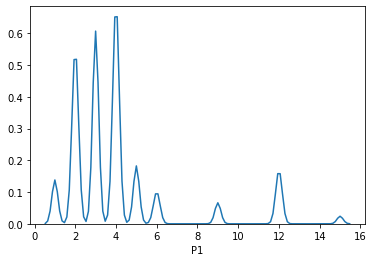

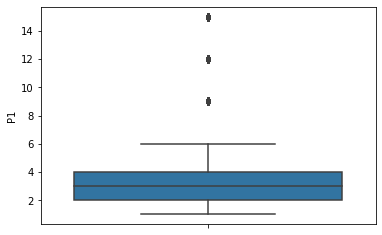






variable    :     P2


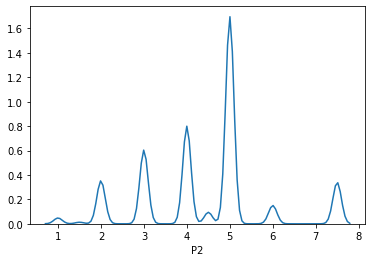

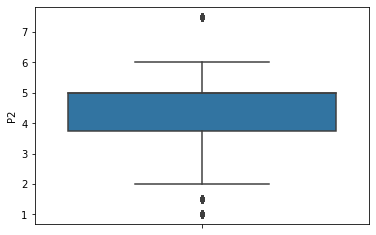






variable    :     P5


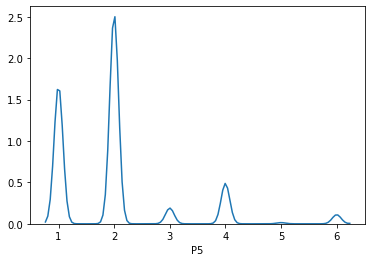

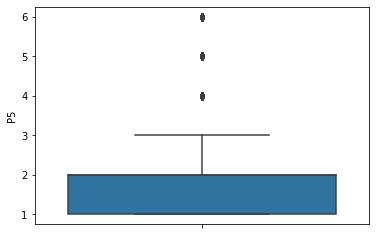






variable    :     P6


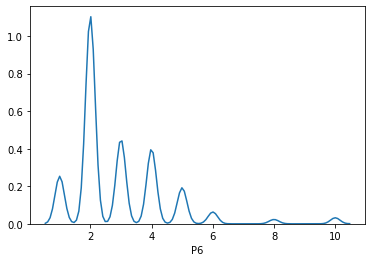

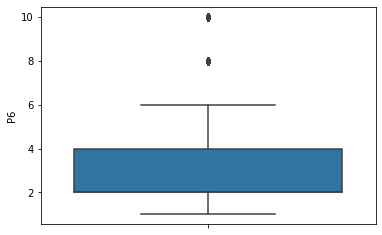






variable    :     P11


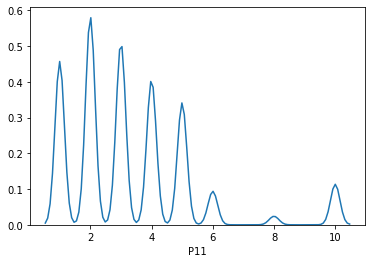

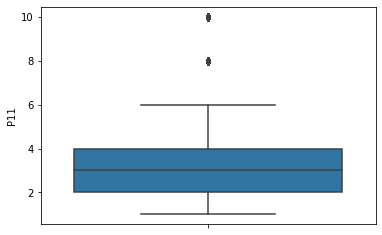






variable    :     P19


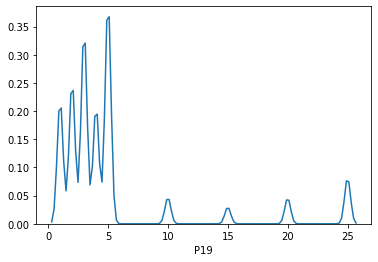

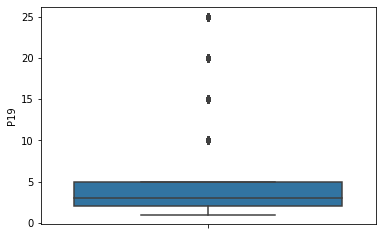






variable    :     P20


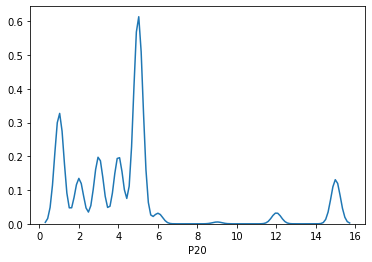

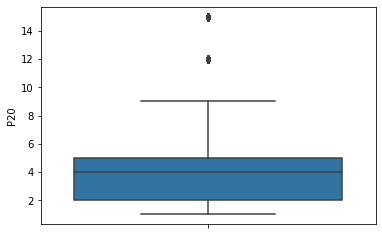






variable    :     P23


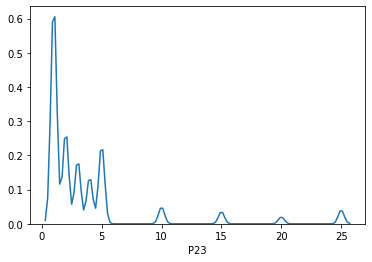

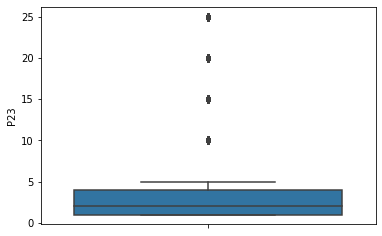






variable    :     P28


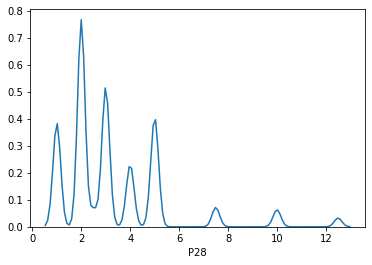

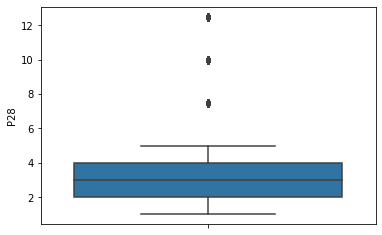






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 110 entries, Id to Type_MB
dtypes: float64(7), int64(28), uint8(75)
memory usage: 33.9 MB


In [360]:
#outlier_list=['P1','P2','P5','P6','P11','P19','P20','P23','P28']


# In[203]:


#for i in range (0,len(outlier_list)):
    
        #q3=df_test[outlier_list[i]].quantile(0.75)
        #q1=df_test[outlier_list[i]].quantile(0.25)
        #iqr=q3-q1
        #df_test=df_test[  (df_test[outlier_list[i]]>=q1-1.5*iqr)  &   (df_test[outlier_list[i]]<=q3+1.5*iqr)   ]


# In[204]:


for i in range (0,len(outlier_list)):

        print("variable    :    ",outlier_list[i])
        sns.distplot(df_test[outlier_list[i]],hist=False)
        plt.show()
        sns.boxplot(y=df_test[outlier_list[i]])
        plt.show()
        print('\n\n\n\n')


# In[205]:


#df_test=df_test.drop(columns=['Id'],axis=1)


# In[206]:


df_test.describe().T


# In[207]:


df_test4=df_test.copy()


# ## converting categorical varibales:

# In[208]:


df_test4[['P9','P10','P13','P22']]=df_test4[['P9','P10','P13','P22']].astype('object')


# In[209]:


df_test4['year_open']=df_test4['Open Date'].apply(lambda i: i[6:10])


# In[210]:


df_test4['current_year']=pd.datetime.now().year   ##to get current year


# In[211]:


df_test4['year_open']=df_test4['year_open'].astype('int64')


# In[212]:


df_test4['year_working']=df_test4['current_year']-df_test4['year_open']


# In[213]:


df_test4=df_test4.drop(columns=['Open Date','year_open','current_year'])


# In[214]:


df_test4=pd.get_dummies(data=df_test4,columns=['P9','P10','P13','P22','City','City Group','Type'],drop_first=True)


# In[215]:


df_test4.info()


# # building statistical model:

# In[218]:


In [361]:
df_test4.head()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P11,...,City_Çanakkale,City_Çankırı,City_Çorum,City_İstanbul,City_İzmir,City_Şanlıurfa,City Group_Other,Type_FC,Type_IL,Type_MB
0,0,1,4.0,4.0,4.0,1,2,5,4,5,...,0,0,0,0,0,0,1,1,0,0
1,1,3,4.0,4.0,4.0,2,2,5,3,2,...,0,0,0,0,0,0,1,0,1,0
2,2,3,4.0,4.0,4.0,2,2,5,4,4,...,0,0,0,0,0,0,0,1,0,0
3,3,2,4.0,4.0,4.0,2,3,5,4,3,...,0,0,0,0,0,0,1,0,1,0
4,4,2,4.0,4.0,4.0,1,2,5,4,3,...,0,0,0,0,0,0,1,1,0,0


In [389]:
df_test4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 116 entries, Id to City_Osmaniye
dtypes: float64(7), int64(34), uint8(75)
memory usage: 38.4 MB


In [390]:
missing_cols=set(xn.columns)-set(df_test4.columns)

In [391]:
len(missing_cols)

0

In [406]:
for i in missing_cols:
    df_test4[i]=0

In [407]:
df_test4.shape

(100000, 116)

In [408]:
x=df_test4.copy()

In [409]:
x=df_test4[xns_svm_cols]

In [410]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(x)

In [411]:
X.shape

(100000, 75)

In [398]:
y_pred=svr.predict(X)

In [399]:
predicted_svm=np.exp(y_pred)
predicted_svm

array([3176743.06951248, 3093757.70369023, 3310846.13926698, ...,
       3462681.71868145, 3519446.93348327, 3443698.34245716])

In [400]:
prediction_svm_df=pd.DataFrame(predicted_svm,columns=['predicted_value'])

In [401]:
prediction_svm_df.shape

(100000, 1)

In [402]:
x['predicted_value']=y_pred

In [403]:
df_test4.head()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P11,...,City Group_Other,Type_FC,Type_IL,Type_MB,City_Karabük,lrevenue,City_Kastamonu,City_Elazığ,revenue,City_Osmaniye
0,0,1,4.0,4.0,4.0,1,2,5,4,5,...,1,1,0,0,0,0,0,0,0,0
1,1,3,4.0,4.0,4.0,2,2,5,3,2,...,1,0,1,0,0,0,0,0,0,0
2,2,3,4.0,4.0,4.0,2,2,5,4,4,...,0,1,0,0,0,0,0,0,0,0
3,3,2,4.0,4.0,4.0,2,3,5,4,3,...,1,0,1,0,0,0,0,0,0,0
4,4,2,4.0,4.0,4.0,1,2,5,4,3,...,1,1,0,0,0,0,0,0,0,0


In [377]:
test=pd.read_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Restaurant_LinearRegression_kaggle/test.csv')

In [378]:
test.shape

(100000, 42)

In [379]:
test['predicted_value']=np.exp(y_pred)

In [380]:
test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,predicted_value
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,3.176743e+06
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,3.093758e+06
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,3.310846e+06
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,3.0,0,4,0,0,0,0,0,0,3.068890e+06
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,3.492026e+06


In [381]:
predict_upload=test[['Id','predicted_value']]

In [382]:
predict_upload.to_csv('C:/Users/SAJAN P MENON/Desktop/prediction_upload_afterEdit.csv')

In [383]:
predict_upload.shape

(100000, 2)

In [384]:
test.shape

(100000, 43)

# scoring with RF

In [385]:
test=test.drop(columns=['predicted_value'],axis=1)

In [386]:
test.sample()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
27013,27013,09/26/2006,Edirne,Other,FC,12,6.0,6.0,6.0,2,...,7.5,5.0,25,3,20,6,6,12,16,6


In [435]:
x=x.drop(columns=['predicted_rf'])

In [438]:
pr=rf.predict(x)

In [439]:
pr

array([14.05340207, 14.05340207, 14.05340207, ..., 14.05340207,
       14.05340207, 14.05340207])

In [415]:
x['predicted_rf_exp']=x['predicted_rf'].apply(lambda x: np.exp(x))

In [428]:
x.head()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P11,...,City_Sakarya,City_Samsun,City_Tekirdağ,City_Uşak,City_İstanbul,City_İzmir,City_Şanlıurfa,City Group_Other,Type_IL,predicted_rf_exp
0,0,1,4.0,4.0,4.0,1,2,5,4,5,...,0,0,0,0,0,0,0,1,0,1.268572e+06
1,1,3,4.0,4.0,4.0,2,2,5,3,2,...,0,0,0,0,0,0,0,1,1,1.268572e+06
2,2,3,4.0,4.0,4.0,2,2,5,4,4,...,0,0,0,0,0,0,0,0,0,1.268572e+06
3,3,2,4.0,4.0,4.0,2,3,5,4,3,...,0,0,0,0,0,0,0,1,1,1.268572e+06
4,4,2,4.0,4.0,4.0,1,2,5,4,3,...,0,0,0,0,0,0,0,1,0,1.268572e+06


In [419]:
x=x.drop(columns=['predicted_rf'],axis=1)

In [423]:
missing_cols=set(xn.columns)-set(x.columns)

In [425]:
xn.shape

(89, 75)

In [426]:
pred=x[['Id','predicted_rf_exp']]

In [427]:
pred.to_csv('C:/Users/SAJAN P MENON/Desktop/prediction_rf.csv')